In [1]:
import numpy as np

import networkx as nx

from qiskit import *
from qiskit_aer import Aer

# importing Qiskit
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

import mapomatic as mm

from src.compatibilityGraph import CompatibilityGraph

import matplotlib.pyplot as plt

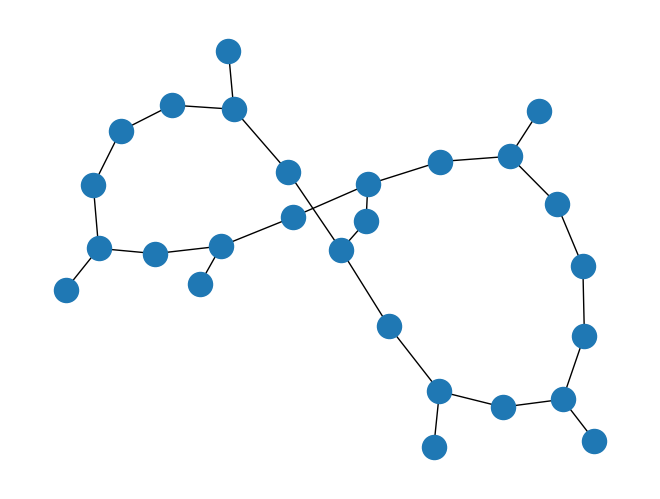

In [2]:
from qiskit_ibm_runtime.fake_provider import FakeGuadalupeV2, FakeAlgiers, FakePeekskill

backend = FakePeekskill()

#backend.coupling_map.make_symmetric()
coupling_map = backend.coupling_map

couplings = backend.coupling_map.get_edges()


qc_graph = nx.from_edgelist(couplings)

nx.draw(qc_graph)

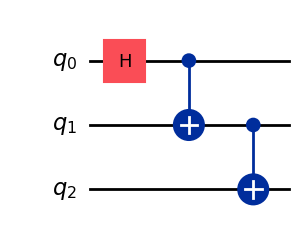

In [3]:
circuit1 = QuantumCircuit(3)
# Add a H gate on qubit $q_{0}$, putting this qubit in superposition.
circuit1.h(0)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{1}$, putting
# the qubits in a Bell state.
circuit1.cx(0, 1)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{2}$, putting
# the qubits in a GHZ state.
circuit1.cx(1, 2)
circuit1.draw('mpl')

In [4]:
area1 = circuit1.num_qubits * circuit1.depth()

In [5]:
trans_qc = transpile(circuit1, backend, optimization_level=3)
trans_qc.draw('mpl')
small_qc = mm.deflate_circuit(trans_qc)
layouts1 = mm.matching_layouts(small_qc, backend)
scores1 = mm.evaluate_layouts(small_qc, layouts1, backend)
print(scores1)

[([10, 12, 13], 0.01436016849750843), ([12, 13, 14], 0.015411614538215823), ([21, 18, 15], 0.017666941341756948), ([10, 7, 6], 0.019056918109391363), ([4, 7, 6], 0.019387054385929803), ([13, 14, 11], 0.021872942369364767), ([13, 14, 16], 0.021994847778689208), ([1, 4, 7], 0.023078010052325015), ([24, 23, 21], 0.02336725442994303), ([10, 12, 15], 0.023446894012712383), ([23, 21, 18], 0.025142180110682255), ([17, 18, 15], 0.025696184135381994), ([24, 25, 26], 0.029384034243437385), ([24, 25, 22], 0.03109611536331469), ([5, 3, 2], 0.047072858155103314), ([8, 5, 3], 0.06155535257347944)]


In [6]:
module1 = ([], area1)

for layout in scores1:
    module1[0].append(layout)

print(module1)

([([10, 12, 13], 0.01436016849750843), ([12, 13, 14], 0.015411614538215823), ([21, 18, 15], 0.017666941341756948), ([10, 7, 6], 0.019056918109391363), ([4, 7, 6], 0.019387054385929803), ([13, 14, 11], 0.021872942369364767), ([13, 14, 16], 0.021994847778689208), ([1, 4, 7], 0.023078010052325015), ([24, 23, 21], 0.02336725442994303), ([10, 12, 15], 0.023446894012712383), ([23, 21, 18], 0.025142180110682255), ([17, 18, 15], 0.025696184135381994), ([24, 25, 26], 0.029384034243437385), ([24, 25, 22], 0.03109611536331469), ([5, 3, 2], 0.047072858155103314), ([8, 5, 3], 0.06155535257347944)], 9)


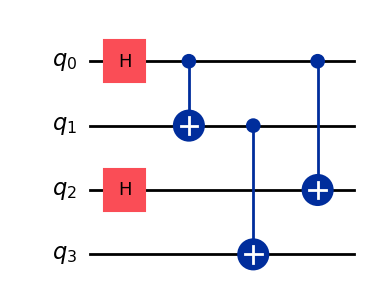

In [7]:
circuit2 = QuantumCircuit(4)
# Add a H gate on qubit $q_{0}$, putting this qubit in superposition.
circuit2.h(0)
circuit2.h(2)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{1}$, putting
# the qubits in a Bell state.
circuit2.cx(0, 1)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{2}$, putting
# the qubits in a GHZ state.
circuit2.cx(1, 3)

circuit2.cx(0, 2)

circuit2.draw('mpl')

In [8]:
area2 = circuit2.num_qubits * circuit2.depth()
print(area2)

12


In [9]:
trans_qc = transpile(circuit2, backend, optimization_level=3)
trans_qc.draw('mpl')
small_qc = mm.deflate_circuit(trans_qc)
layouts2 = mm.matching_layouts(small_qc, backend)
scores2 = mm.evaluate_layouts(small_qc, layouts2, backend)

In [10]:
module2 = ([], area2)

for layout in scores2:
    module2[0].append(layout)

print(module2)

([([10, 12, 13, 14], 0.024201942698270362), ([12, 13, 14, 11], 0.02611151551738855), ([12, 13, 14, 16], 0.02623289266712714), ([1, 4, 7, 6], 0.028882519490449954), ([23, 21, 18, 15], 0.03136558552582591), ([24, 23, 21, 18], 0.033852058802068874), ([8, 5, 3, 2], 0.07194525719151001)], 12)


In [11]:
modules = [module1, module2]

In [12]:
graphGen = CompatibilityGraph(buffer_distance=2, coupling_map= coupling_map, modules=modules)
compGraph = graphGen.generateCompatibilityGraph()

23
3
2
2
0
[{10, 12, 13}, {1, 4, 6, 7}]
neighbour qubits = [10, [7, 12]]
neighbour qubits = [12, [10, 13, 15]]
neighbour qubits = [13, [14, 12]]
neighbour qubits = [1, [2, 4, 0]]
neighbour qubits = [4, [7, 1]]
neighbour qubits = [7, [10, 6, 4]]
neighbour qubits = [6, [7]]
[[10, 12, 13], [1, 7]]
[10, 1, 3]
[10, 7, 1]
0
[{10, 12, 13}, {18, 15, 21, 23}]
neighbour qubits = [10, [7, 12]]
neighbour qubits = [12, [10, 13, 15]]
neighbour qubits = [13, [14, 12]]
neighbour qubits = [23, [21, 24]]
neighbour qubits = [21, [23, 18]]
neighbour qubits = [18, [17, 21, 15]]
neighbour qubits = [15, [18, 12]]
[[10, 12, 13], [23, 18, 15]]
[10, 23, 5]
[10, 18, 3]
[10, 15, 2]
0
[{10, 12, 13}, {24, 18, 21, 23}]
neighbour qubits = [10, [7, 12]]
neighbour qubits = [12, [10, 13, 15]]
neighbour qubits = [13, [14, 12]]
neighbour qubits = [24, [25, 23]]
neighbour qubits = [23, [21, 24]]
neighbour qubits = [21, [23, 18]]
neighbour qubits = [18, [17, 21, 15]]
[[10, 12, 13], [24, 18]]
[10, 24, 6]
[10, 18, 3]
[12, 24,

In [19]:
print(compGraph.number_of_nodes())
print(compGraph.number_of_edges())

23
76


In [14]:
# if(compGraph.number_of_edges() > 0):
#     set_subgraphs_g = [compGraph.subgraph(comp).copy() for comp in nx.connected_components(compGraph.to_undirected())]
#     set_connected_g = []
#     for graph in set_subgraphs_g:
#         if graph.number_of_nodes() > 1:
#             set_connected_g.append(graph)
#     print(len(set_connected_g))
#     fig, axs = plt.subplots(ncols=len(set_connected_g), figsize=(14, 4))
#     i = 0
#     for graph in set_connected_g:
#         if(graph.number_of_nodes() > 1):
#             nx.draw(graph, with_labels=True)
#             i += 1
# else: 
#     print('No edges')

In [15]:
# nx.draw(compGraph)

Clique con somma dei pesi massima: [(1, 0), (0, 8)]
Somma dei pesi: 0.6424795223192208


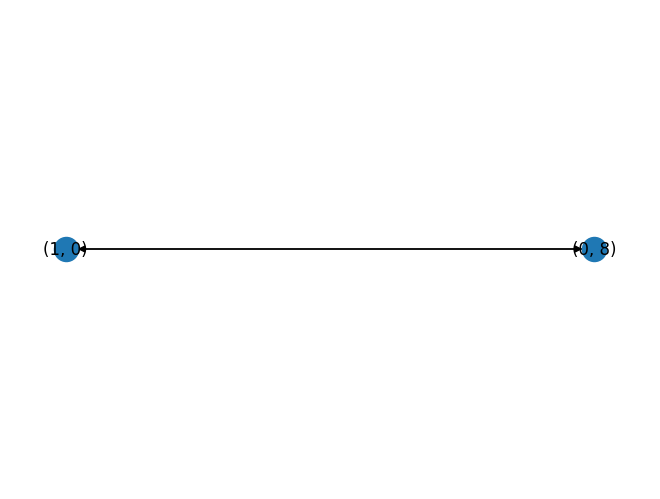

In [38]:
from max_clique import find_max_clique


max_clique, max_weight = find_max_clique(compGraph.to_undirected())
print("Clique con somma dei pesi massima:", max_clique)
print("Somma dei pesi:", max_weight)
nx.draw_planar(compGraph.subgraph(max_clique), with_labels = True)

In [21]:
best_layout1 = modules[max_clique[0][0]][0][max_clique[0][1]][0]
print(best_layout1)
best_layout2 = modules[max_clique[1][0]][0][max_clique[1][1]][0]
print(best_layout2)

[10, 12, 13, 14]
[24, 23, 21]


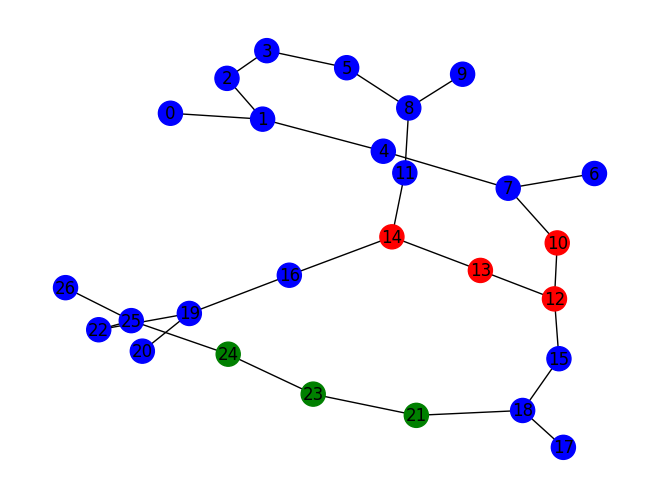

In [31]:
color_map = []
for node in qc_graph:
    if node in best_layout1:
        color_map.append('red')
    elif node in best_layout2:
        color_map.append('green')    
    else:
        color_map.append('blue')  
nx.draw(qc_graph, node_color=color_map, with_labels=True)